# Twitter Sentiment Analysis
<br>
Entity-level sentiment analysis on multi-lingual tweets.

In [3]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

# make with this report 
import pandas_profiling

# gnore all warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# columns transformer 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Alogrithim 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier




# Hyperpearmeter turning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, GridSearchCV


# text preprocessing 
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## model accuary metrices 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


## dorp the model in pickle 
import pickle

# Load the data


In [4]:
# Define column names
column_names = ['Tweet ID','entity', 'sentiment', 'Tweet content']
twitter_Sentiment = pd.read_csv("D:\\Twitter-Sentiment-Analysis\\data\\twitter_training.csv",names=column_names)
twitter_Sentiment.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Now making the report of the twitter sentiment using pandas priflling 

In [5]:
from pandas_profiling import ProfileReport  # Ensure you have this library installed


profile = ProfileReport(twitter_Sentiment, title="Pandas Profiling Report", explorative=True)

# Generate the report
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Drop unnecessary columns
columns_to_drop = ['Tweet ID', 'entity']
twitter_Sentiment = twitter_Sentiment.drop(columns=columns_to_drop)

In [7]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
twitter_Sentiment.shape

(74682, 2)

In [9]:
twitter_Sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment      74682 non-null  object
 1   Tweet content  73996 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [10]:
## checking the values of the data
null_values = twitter_Sentiment.isnull().sum()

print(f"null values: \n {null_values}")

null values: 
 sentiment          0
Tweet content    686
dtype: int64


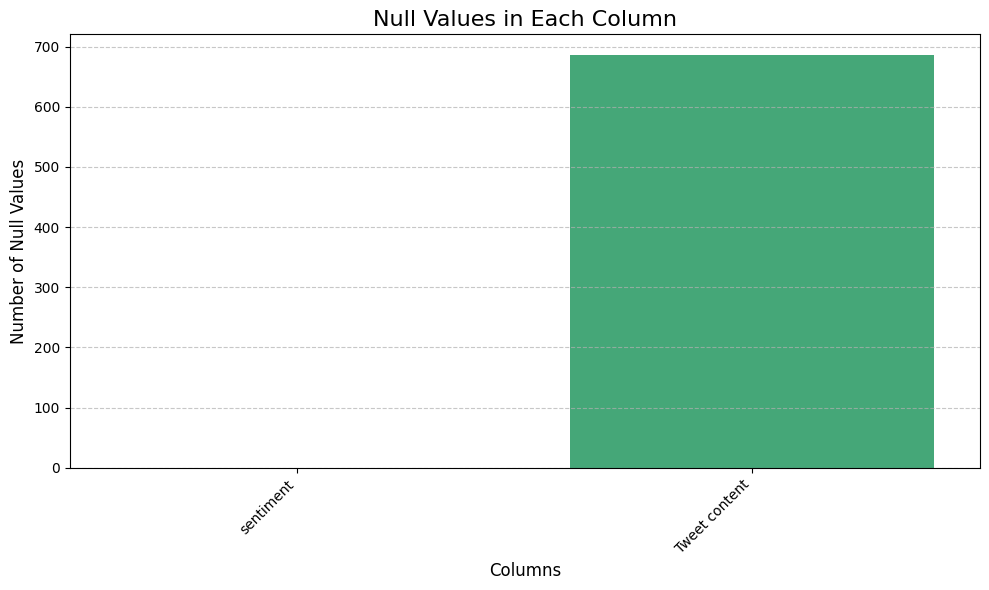

In [11]:
# Plot the null values
plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values, palette='viridis')

# Add plot labels and title
plt.title("Null Values in Each Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Null Values", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
# Calculate percentage of null values in each column
null_percentage = twitter_Sentiment.isnull().mean() * 100

# Display the percentages
print("Percentage of Null Values in Each Column:")
print(null_percentage)

Percentage of Null Values in Each Column:
sentiment        0.000000
Tweet content    0.918561
dtype: float64


In [13]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [14]:
# Initialize SimpleImputer to fill missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the 'Tweet content' column to fill missing values
# Note: .ravel() is used to flatten the 2D array into 1D
twitter_Sentiment['Tweet content'] = imputer.fit_transform(twitter_Sentiment[['Tweet content']]).ravel()

In [15]:
# Calculate percentage of null values in each column
null_percentage = twitter_Sentiment.isnull().mean() * 100

# Display the percentages
print("Percentage of Null Values in Each Column:")
print(null_percentage)

Percentage of Null Values in Each Column:
sentiment        0.0
Tweet content    0.0
dtype: float64


In [16]:
# Check for duplicate rows in the entire dataframe
duplicates = twitter_Sentiment[ twitter_Sentiment.duplicated() ]

# If you want to check the number of duplicates
num_duplicates = twitter_Sentiment.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)



Number of duplicate rows: 4913


In [17]:
# Remove duplicate rows
twitter_Sentiment = twitter_Sentiment.drop_duplicates()


In [18]:
# If you want to check the number of duplicates
twitter_Sentiment.duplicated().sum()

np.int64(0)

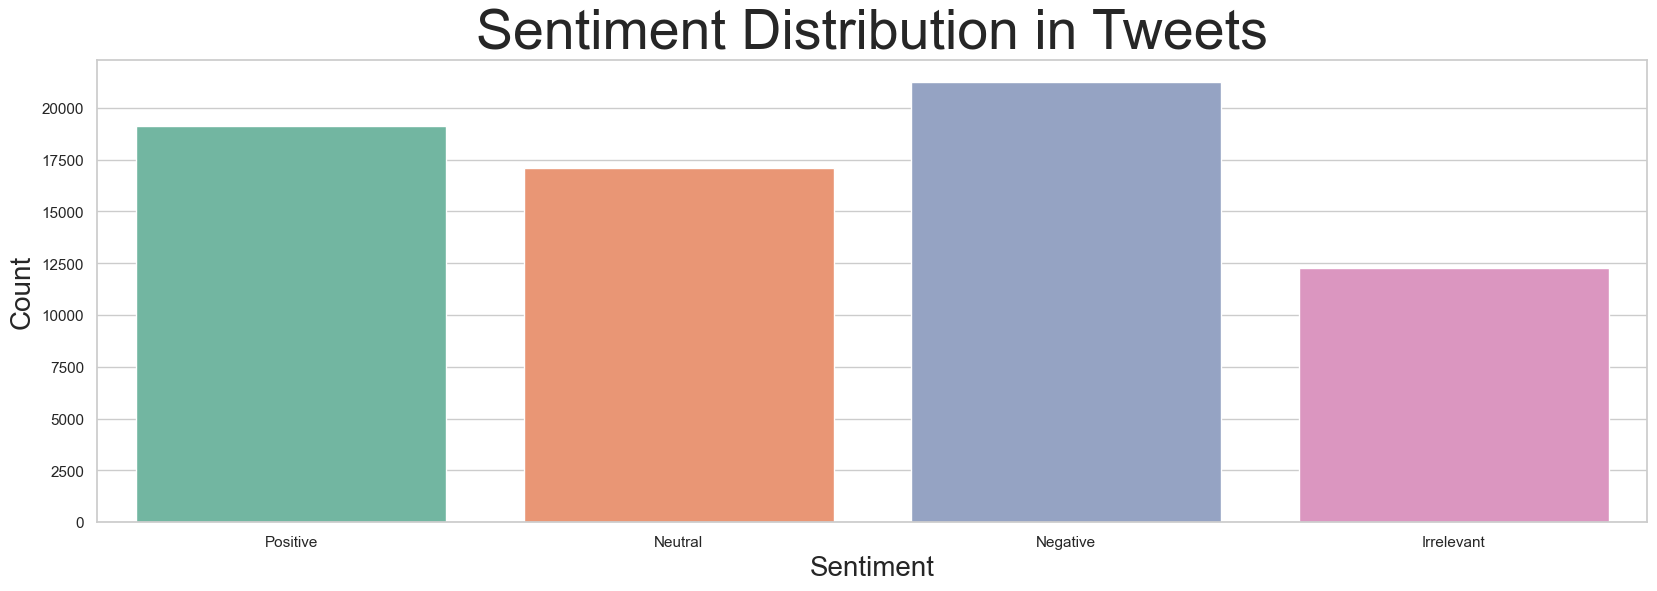

In [19]:
# Set the style of the plot
sns.set(style="whitegrid")

# Plot the count of sentiment categories
plt.figure(figsize=(20, 6))
sns.countplot(data=twitter_Sentiment, x='sentiment', palette='Set2')

# Add labels and title
plt.title('Sentiment Distribution in Tweets',fontsize = 40)
plt.xlabel('Sentiment',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

# Show the plot
plt.show()

In plot the Negative sentiment count is greater than the Positive sentiment count 

# LabelEncoding

In [20]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to a categorical column (e.g., 'author_id')
twitter_Sentiment['sentiment'] = encoder.fit_transform(twitter_Sentiment['sentiment'])

In [21]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting on borderlands and i will murder yo...
1,3,I am coming to the borders and I will kill you...
2,3,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...


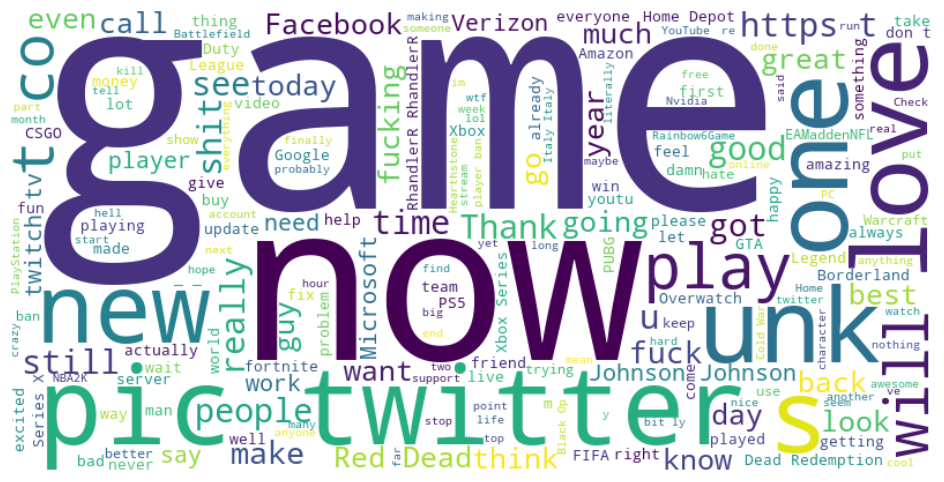

In [22]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Assuming you have a column 'Tweet content' in your dataframe
text_data = twitter_Sentiment['Tweet content'].dropna().str.cat(sep=' ')  # Combine all the tweets into one string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()

Tweet content --> In the text most time used of now,game,play,will,love, people etc.

# Text preprocessing  

In [23]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting on borderlands and i will murder yo...
1,3,I am coming to the borders and I will kill you...
2,3,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...


In [24]:
twitter_Sentiment['Tweet content'].sample(5)

10066    New Xbox home for UI status update in preview....
47575    The crazy governor of Michigan is now telling ...
47125    Thank you and wish you all the best! =] @ chip...
15227    <unk> out the amazing giveaway by @gringamingi...
73602    Nvidia GTX RTX 3080 Leaked – Twice the Hashrat...
Name: Tweet content, dtype: object

Text prepocessing 
<br>
1 --> lower casing 
<br>
2 --> puncturation
<br> 
3 --> stop word 
<br>
4 ---> Tokenization 
<br>
5 --> stemming 
<br>
6 --> Lemmatization 

Lower casing 

In [25]:
twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].str.lower()

In [26]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting on borderlands and i will murder yo...
1,3,i am coming to the borders and i will kill you...
2,3,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...


In [27]:
twitter_Sentiment['Tweet content'][6]

"so i spent a few hours making something for fun. . . if you don't know i am a huge @borderlands fan and maya is one of my favorite characters. so i decided to make myself a wallpaper for my pc. . here is the original image versus the creation i made :) enjoy! pic.twitter.com/mlsi5wf9jg"

Remove the puncturation

In [28]:
import string
exclude  = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [29]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting on borderlands and i will murder yo...
1,3,i am coming to the borders and i will kill you...
2,3,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...


In [30]:
# Remove punctuation from the 'Text' column
twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [31]:
# Download the stop words list
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# Set of stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the 'Text' column
twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [33]:
twitter_Sentiment['Tweet content'][0]

'im getting borderlands murder'

In [34]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting borderlands murder
1,3,coming borders kill
2,3,im getting borderlands kill
3,3,im coming borderlands murder
4,3,im getting borderlands 2 murder


Tokenizers

In [35]:
# Download the tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
# # Tokenize the 'Text' column
# twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].apply(word_tokenize)


In [37]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting borderlands murder
1,3,coming borders kill
2,3,im getting borderlands kill
3,3,im coming borderlands murder
4,3,im getting borderlands 2 murder


In [38]:
# Download necessary NLTK data if not already downloaded
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
from nltk.stem import PorterStemmer
# Initialize PorterStemmer
ps = PorterStemmer()

# Define the transformation function
def transform_text(text):
    # Tokenize the text
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():  # Keep only alphanumeric tokens
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Apply stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)



In [40]:
twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].apply(transform_text)

Model building

In [41]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im get borderland murder
1,3,come border kill
2,3,im get borderland kill
3,3,im come borderland murder
4,3,im get borderland 2 murder


In [42]:
# Drop column 'B'
X = twitter_Sentiment.drop('sentiment', axis=1)
y = twitter_Sentiment['sentiment'] 

In [43]:
X.head()

,Tweet content
0,im get borderland murder
1,come border kill
2,im get borderland kill
3,im come borderland murder
4,im get borderland 2 murder


In [44]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: sentiment, dtype: int64

In [45]:
print(f"shape : {X.shape} , shape : {y.shape} ")

shape : (69769, 1) , shape : (69769,) 


In [46]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train

,Tweet content
25207,took 6 hour googl respond submit request revie...
52097,final play red dead redempt 2 last night but b...
27597,look fun
61159,still dont know what go gta
39910,ban battlefield legend 4 dvd player feenalslic...
...,...
39824,pretti easi get
6601,amazon doesnt deliv hood
58815,gon na go wild 100bn your make stfu game play ...
891,unpopular opinion none game good


In [48]:
print("X_train shape:",X_train.shape,"X_test shape :",X_test.shape ,"y_train shape :",y_train.shape,"y_test shape : ",y_test.shape)

X_train shape: (55815, 1) X_test shape : (13954, 1) y_train shape : (55815,) y_test shape :  (13954,)


In [49]:
# Convert DataFrame to 1D numpy array
X_train = X_train.values.ravel()  # or X_train.to_numpy().ravel()
X_test = X_test.values.ravel()    # or X_test.to_numpy().ravel()


In [50]:
X_train
print(X_test)

['pubg mobil test india massiv controversi rock game'
 'im amaz mani peopl still play champion leagu toxic game far honestli bad play pure commun alon'
 'thank teamendpoint gorgeou' ... 'xbox ubisoftunk that great gameplay'
 'peopl eat eight spider sleep per year centaur two rib cage dwarv counterfeit titan'
 'virtu pro far best dota 2 team ci right dotesportscom dota2 news']


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the training data and transform it
X_train_tfidf = vectorizer.fit_transform(X_train)

In [52]:
# Function to create a pipeline
def build_pipeline(clf):
    return Pipeline([
        ("tfidf", TfidfVectorizer(max_features=5000)),  # TF-IDF feature extraction
        ("classifier", clf)  # Classifier
    ])

In [53]:
# Classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Linear SVC": LinearSVC(),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

In [ ]:
# Training and evaluating all classifiers
results = {}
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    pipeline = build_pipeline(clf)
    pipeline.fit(X_train, y_train)  # Train
    y_pred = pipeline.predict(X_test)  # Predict
    acc = accuracy_score(y_test, y_pred)  # Evaluate
    print(f"Accuracy for {name}: {acc:.2f}")
    print(classification_report(y_test, y_pred))  # Detailed metrics
    results[name] = acc